 # new vulnerability 1
# Github link: https://github.com/apache/geronimo
# Cve Id: CVE-2009-0039
 #Cwe id: 352
Vulnerability type: Cross Site Request Forgery(csrf)
Fixing Commit: 67dda0760bb0925ead201ddd5d809ff53686d63f
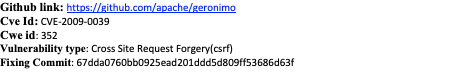

In [2]:
import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
import git
import datetime
import time

In [3]:
import numpy as np
import pandas as pd
import os
import re
import copy
from collections import Counter
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
from collections import Counter
import git
from git import RemoteProgress
import pprint as pprint
from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from collections import Counter
%matplotlib inline

In [4]:
class first(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [25]:
repo = Repo("geronimo/")
fixing_commit ="67dda0760bb0925ead201ddd5d809ff53686d63f"

# info of the commit

In [26]:
show_info = repo.git.show("-s", fixing_commit).splitlines()
for line in show_info:
    print(line)

commit 67dda0760bb0925ead201ddd5d809ff53686d63f
Author: Joseph Alan Bohn <jbohn@apache.org>
Date:   Wed Mar 25 15:11:16 2009 +0000

    GERONIMO-4597 Validate Web Admin Console input - fixes for CVE-2008-5518, CVE-2009-0038, and CVE-2009-0039
    
    git-svn-id: https://svn.apache.org/repos/asf/geronimo/server/trunk@758297 13f79535-47bb-0310-9956-ffa450edef68


# number of effected files

In [82]:
total_affectedfiles = repo.git.show("--stat",fixing_commit).splitlines()
print("the total number of affected files are")
total_affectedfiles=total_affectedfiles[6:]
for line in total_affectedfiles:
    print(line)

the total number of affected files are
    git-svn-id: https://svn.apache.org/repos/asf/geronimo/server/trunk@758297 13f79535-47bb-0310-9956-ffa450edef68

 .../kernel/repository/AbstractRepository.java      |  15 +-
 .../apache/geronimo/kernel/util/InputUtils.java    |  55 ++++
 .../security/keystore/FileKeystoreManager.java     |   5 +
 plugins/ca-helper/geronimo-ca-helper/pom.xml       |   6 +
 .../src/main/webapp/WEB-INF/web.xml                |  14 ++
 .../WEB-INF/view/keystore/createKeystore.jsp       |   4 +
 .../main/webapp/WEB-INF/view/repository/normal.jsp |  16 +-
 plugins/console/console-filter/LICENSE.txt         | 203 +++++++++++++++
 plugins/console/console-filter/NOTICE.txt          |  11 +
 plugins/console/console-filter/pom.xml             |  42 ++++
 .../console/filter/FilterResponseWrapper.java      | 182 ++++++++++++++
 .../console/filter/ResponseOutputStream.java       |  75 ++++++
 .../geronimo/console/filter/XSRFHandler.java       | 277 +++++++++++++++++++++
 ...

In [74]:
remote_link_rest = 'https://github.com/apache/geronimo'

In [84]:
rest_fixing_commit = '67dda0760bb0925ead201ddd5d809ff53686d63f'
rest_files = ['...dules/geronimo-kernel/src/main/java/org/apache/geronimo/kernel/repository/AbstractRepository.java',
        'framework/modules/geronimo-kernel/src/main/java/org/apache/geronimo/kernel/util/InputUtils.java',
        '...es/geronimo-security/src/main/java/org/apache/geronimo/security/keystore/FileKeystoreManager.java',
        'plugins/ca-helper/geronimo-ca-helper/pom.xml']


In [85]:
rest_fixing_commit = '67dda0760bb0925ead201ddd5d809ff53686d63f'

In [ ]:
class vcc:
    
    def __init__(this, target_repo, flags):
        this.repo = git.Repo(target_repo)
        this.flag = flags
    def get_vcccommits(this, commit, files):
    
        blamed_commits = {}
        added_blamed_commits = {}
        removed_blamed_commits = {}
        for file in files:
            
            diff_full_context = this.repo.git.diff("-W", commit + "~", commit, "--", file)
        
            diff_no_context = this.repo.git.diff("-U0", commit + "~", commit, "--", file)
        
            added_lines = set()
           
            removed_lines = set()
        
        for line in diff_full_context.splitlines():
                
                if not line.startswith('@@'):
                    continue
              
                clean_line = line.split('@@')[1]
                half_line = clean_line.split('+')[1]
                start = int(half_line.split(',')[0])
                if ',' in half_line:
                    length = int(half_line.split(',')[1])
                else:
                    length = 1
                 
                for number in range(start, start + length):
                    added_lines.add(number)
            
        for line in diff_no_context.splitlines():
                if not line.startswith('@@'):
                    continue
               
                clean_line = line.split('@@')[1]
                half_line = clean_line.split('+')[0]
                
                half_line = half_line.replace('-','')
                
                start = int(half_line.split(',')[0])
                if ',' in half_line:
                    length = int(half_line.split(',')[1])
                else:
                    length = 1
                
                for number in range(start, start + length):
                    removed_lines.add(number)
                for line in added_lines:
                    if this.flag == '':
                         blame = this.repo.git.blame("-L", str(line) + "," + str(line+1), commit, "--", file)
                    else:
                         blame = this.repo.git.blame("-L", str(line) + "," + str(line+1), this.flag, commit, "--", file)
                    
                         blamed_commit = blame.split(" ")[0]
            
                
                if commit.startswith(blamed_commit):
                    continue
                    

                if blamed_commit in blamed_commits:
                    blamed_commits[blamed_commit] += 1
                else:
                    blamed_commits[blamed_commit] = 1
               
                
                if blamed_commit in added_blamed_commits:
                    added_blamed_commits[blamed_commit] += 1
                else:
                    added_blamed_commits[blamed_commit] = 1
                    
                for line in removed_lines:
                    if this.flag == '':
                        blame = this.repo.git.blame("-L", str(line) + "," + str(line+1), commit + "~", "--", file)
                    else:
                        blame = this.repo.git.blame("-L", str(line) + "," + str(line+1), this.flag, commit + "~", "--", file)
                    
                        blamed_commit = blame.split(" ")[0]
                
               
                if commit.startswith(blamed_commit):
                    continue
            
                if blamed_commit in blamed_commits:
                    blamed_commits[blamed_commit] += 1
                else:
                    blamed_commits[blamed_commit] = 1
                    
                if blamed_commit in removed_blamed_commits:
                    removed_blamed_commits[blamed_commit] += 1
                else:
                    removed_blamed_commits[blamed_commit] = 1
        
        print("Blamed commits for lines which were added: ")
        print(added_blamed_commits)
        print("Blamed commits for lines which were removed: ")
        print(removed_blamed_commits)
        return blamed_commits
    
    def selectvcc(blamed_commits):
        max_blame = 0
        commit = ''
        for key, value in blamed_commits.items():
            if value > max_blame:
                max_blame = value
                commit = key
            
        return commit


In [ ]:
for item in ['', '-w', '-wM', '-wC', '-wCC', '-wCCC']:
    # Run the vulnerability_causing commit finder for rest repository with specified flag
    print("rest with: " + item)
    rest_vcc_finder = vulnerability_causing_commit_finder(local_link_rest, item)
    result = rest_vcc_finder.get_blamed_commits(rest_fixing_commit,rest_files) 
    print("************Total blamed commits*************: ")
    print(result)
    vulnerability_causing_commit = vulnerability_causing_commit_finder.select_vulnerability_causing_commit(result)
    print("Vulnerability Causing Commit: ")
    print(vulnerability_causing_commit)

In [58]:
num_VCCCommits= ['f0bfa16a8b6']

#Is the developer of the current fixing commit and its corresponding VCC the same?

In [59]:
for VCC in num_VCCCommits:
    if VCC[0]=='^':
        VCC=VCC[1:]
    try:
        VCCParent= repo.git.show(VCC+"^").splitlines()
    except: 
        pass
print("Parent commit exists, as such it isn't an initial commit!")

Parent commit exists, as such it isn't an initial commit!


#How  many  days  were  between  the  current  fixing  commit  and  its 
corresponding  VCC? 

In [60]:
commit=repo.commit(fixingCommit)
fixing_Commit_Author=commit.author.email
print(fixing_Commit_Author)
for commits in num_VCCCommits:
    num_VCCcommit=repo.commit(commits)
    VCCCommitAuthor=VCCcommit.author.email
    if(fixinCommitAuthor==VCCCommitAuthor):
        print("Yes The  fixing commit author is : {} is same in commit: {}".format(fixinCommitAuthor,VCCcommit))

jbohn@apache.org


#How many days were between the current fixing commit and its corresponding VCC?



In [61]:
from datetime import datetime
com=repo.commit(fixingCommit)
fixing_Commit_Author=commit.author.email
dateof_Fixing=repo.git.show("-s","--format=%ci",commit).split(" ")
dateof_Fixing=dateFixing[0]
dateof_Fixing=datetime.strptime("{}".format(dateFixing), '%Y-%m-%d').date()
time_different = 0
sum = 0
count = 0
for num_commits in VCCCommits:
    date=repo.git.show("-s","--format=%ci",commits).split(" ")
    date=date[0]
    date= datetime.strptime("{}".format(date), '%Y-%m-%d').date()
    days=dateFixing-date
    print("Fixing commit: {} and VCC commit: {} was fixed in: {} ".format(commit,commits,days))
    

Fixing commit: 67dda0760bb0925ead201ddd5d809ff53686d63f and VCC commit: f0bfa16a8b6 was fixed in: 512 days, 0:00:00 


#Vulnerability 2:

Github link: 	https://github.com/jenkinsci/checkstyle-plugin
Cve Id: CVE-2018-11777
Cwe id: 290
Vulnerability type: security-bypass vulnerability.
Fixing Commit: 00c0ee7bc4b8492476b377a6edafcc33411f14b


In [6]:
import numpy as np
import pandas as pd
import os
import re
import copy
from collections import Counter
# Specify git executable file for GitPython in Jupyter Notebook (In IDE, it can still work without this line.)
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
from collections import Counter
import git
from git import RemoteProgress
import pprint as pprint
from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from collections import Counter
%matplotlib inline

In [7]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [15]:
repo = Repo("hive/")
fixing_commit ="00c0ee7bc4b8492476b377a6edafcc33411f14b"

In [11]:
show_info = repo.git.show("-s", fixing_commit).splitlines()
for line in show_info:
    print(line)

commit 00c0ee7bc4b8492476b377a6edafcc33411f14b6
Author: Daniel Dai <daijyc@gmail.com>
Date:   Thu Oct 25 00:11:20 2018 -0700

    HIVE-20420: Provide a fallback authorizer when no other authorizer is in use (Daniel Dai, reviewed by Laszlo Pinter, Thejas Nair)
    
    Signed-off-by: Thejas M Nair <thejas@hortonworks.com>


In [12]:
total_affectedfiles = repo.git.show("--stat",fixing_commit).splitlines()
print("the total number of affected files are")
total_affectedfiles=total_affectedfiles[6:]
for line in total_affectedfiles:
    print(line)

the total number of affected files are
    Signed-off-by: Thejas M Nair <thejas@hortonworks.com>

 .../plugin/fallback/FallbackHiveAuthorizer.java           |  8 +++++++-
 .../authorization/plugin/sqlstd/Operation2Privilege.java  | 15 +++++++++++++++
 2 files changed, 22 insertions(+), 1 deletion(-)


In [14]:
def funtomodify(modification):
    line=modification
    line=line.split('@@')[1]
    line=line.replace('-','')
    line=line.replace('+','')
    line=line.replace(" ",",")
    line=line.split(",")
    buffDel=[int(line[1]),int(line[1])+int(line[2])-1]
    buffAdd=[int(line[3]),int(line[3])+int(line[4])-1]
    linesDeleted.append(buffDel)
    linesAdded.append(buffAdd)
    
def wts(line,added_commits,fileComp):
    fullCompleteIndex = (int(line[line.rfind(" ", 0,line.find(")")):line.find(")")]) - 1)-1 
    exited = False
    noSkip = True
    while fullCompleteIndex >= 0:
        content = fileComp[fullCompleteIndex][line.find(") ")+2:].strip()
        if content.endswith("}"):
            noSkip = False
        if content.endswith("{") and not noSkip:
            noSkip = True
        elif content.endswith("{") and noSkip:
            hashedCode = repo.git.rev_parse(fileComp[fullCompleteIndex][:fileComp[fullCompleteIndex].find(" ")])
            if file in added_commits["CVE-2018-11777"]:
                added_commits["CVE-2018-11777"][file].append(hashedCode)
            else:
                added_commits["CVE-2018-11777"][file] = [hashedCode]
            exited = True
            break
        fullCompleteIndex -= 1
    if fullCompleteIndex < 0 and not exited:
        hashedCode =repo.git.rev_parse(line[:line.find(" ")])
        if file in added_commits["CVE-2018-11777"]:
            added_commits["CVE-2018-11777"][file].append(hashedCode)
        else:
            added_commits["CVE-2018-11777"][file] = [hashedCode]  
            
def hashCode(linesModifiedDictDup,foundFlag,line,file):
    linesModifiedDictDup["CVE-2018-11777"][file]["deleted_lines"].remove(foundFlag)
    hashedCode = repo.git.rev_parse(line[:line.find(" ")])
    if file in commitsDeleted["CVE-2018-11777"]:
        commitsDeleted["CVE-2018-11777"][file].append(hashedCode)
    else:
        commitsDeleted["CVE-2018-11777"][file] = [hashedCode]
        
def printLines(commitsDeletedOrAdded):
    delAddCommitsNumb = {}
    
    for files in commitsDeletedOrAdded:
        print("Vulnerability Associated: ", files)
        delAddCommitsNumb[files] = {}
        for file in commitsDeletedOrAdded[files]:

            print("File Associated: ", file)
            fileCommitNumb = Counter(commitsDeletedOrAdded[files][file])
            if file in delAddCommitsNumb[files]:
                delAddCommitsNumb[files][file].append(fileCommitNumb)
            else:
                delAddCommitsNumb[files][file] = [fileCommitNumb]
            for commit, count in zip(fileCommitNumb.keys(), fileCommitNumb.values()):
                print("Count of Commits:", count, ", Commit:", commit)
        print("\n")
repo =Repo("hive/")
fixingCommit = "00c0ee7bc4b8492476b377a6edafcc33411f14b"
previousCommit=fixingCommit+"^1"
lineChanges={}
showData = repo.git.diff("--name-only", fixingCommit, previousCommit).splitlines()
files=showData
lineChanges = {}
lineChanges[""]={}
linesModifiedBetween = {}
linesModifiedBetween["CVE-2018-11777"] = {}
for file in files:
    showData = repo.git.show(fixingCommit, "--", file).splitlines()
    linesAdded = []
    linesDeleted = []
    for modification in showData:
        if "@@" in modification:
            funtomodify(modification)
    linesModifiedBetween["CVE-2018-11777"][file] = {"added_ranges": linesAdded, "deleted_ranges": linesDeleted}
linesModifiedDict = {}
linesModifiedDict["CVE-2018-11777"] = {}
for file in files:
    showData = repo.git.show(fixingCommit, "--", file).splitlines()
    linesAddedAsCode = []
    linesDeletedAsCode = []
    for lines in showData:
        if lines.startswith('+') and not lines.startswith('+++'):
            linesAddedAsCode.append(lines)
        elif lines.startswith('-') and not lines.startswith('---'):
            linesDeletedAsCode.append(lines)
    linesModifiedDict["CVE-2018-11777"][file] = {"added_lines": linesAddedAsCode, "deleted_lines": linesDeletedAsCode}
linesModifiedDictDup = copy.deepcopy(linesModifiedDict)
commitsDeleted = {}
commitsDeleted["CVE-2018-11777"] = {}
for file in linesModifiedBetween["CVE-2018-11777"]:
    for deletedLines in linesModifiedBetween["CVE-2018-11777"][file]["deleted_ranges"]:
        blamedShowData = repo.git.blame(previousCommit, "-L", str(deletedLines[0])+","+str(deletedLines[1]), "--", file).splitlines()
        for line in blamedShowData:
            blamedLineShowData = line.partition(") ")[2].strip()
            foundFlag = None
            for deletedLineCode in linesModifiedDictDup["CVE-2018-11777"][file]["deleted_lines"]:
                if blamedLineShowData in deletedLineCode[2:]:
                    foundFlag = deletedLineCode
                    break
            if foundFlag != None:
                hashCode(linesModifiedDictDup,foundFlag,line,file)

print("***********Number of DELETED COMMITS************")               
printLines(commitsDeleted)
linesModifiedDictDup = copy.deepcopy(linesModifiedDict)
added_commits = {}
added_commits["CVE-2018-11777"] = {}
for file in linesModifiedBetween["CVE-2018-11777"]:
    fileComp = repo.git.blame(fixingCommit, "--", file).splitlines()
    for linesAdded in linesModifiedBetween["CVE-2018-11777"][file]["added_ranges"]:
        blamedShowData = repo.git.blame(fixingCommit, "-L", str(linesAdded[0])+","+str(linesAdded[1]), "--", file).splitlines()
        for line in blamedShowData:
            blamedLineShowData = line[line.find(") ")+2:].strip()
            foundFlag= None
            for linesAdded in linesModifiedDictDup["CVE-2018-11777"][file]["added_lines"]:
                if blamedLineShowData in linesAdded[2:]:
                    foundFlag = linesAdded
                    break
            if foundFlag != None:
                linesModifiedDictDup["CVE-2018-11777"][file]["added_lines"].remove(foundFlag)
                # Finding smallest enclosing scope
                withinthescope(line,added_commits,fileComp)
print("***********Number of added Commits ************")
printLines(added_commits)
VCC = {}
VCCCommits=[]
print("***********Vulnerability Contributing Commits************")
# Counting commits
for v in commitsDeleted:
    VCC[v] = {}
    print(v)
    for f in added_commits[v]:
        print("    *", f)
        if f in commitsDeleted[v] and f in added_commits[v]:
            counted_commits = Counter(commitsDeleted[v][f]+added_commits[v][f])
        elif f in commitsDeleted[v] and f not in added_commits[v]:
            counted_commits = Counter(commitsDeleted[v][f])
        elif f not in commitsDeleted[v] and f in added_commits[v]:
            counted_commits = Counter(added_commits[v][f])
        VCC[v][f] = {"count": 0, "commit": ""}
        for commit, count in zip(counted_commits.keys(), counted_commits.values()):
            if (count > VCC[v][f]["count"]):
                if commit != fixingCommit:
                    VCC[v][f] = {"count": count, "commit": commit}
            elif (count == VCC[v][f]["count"]):
                if commit != fixingCommit:
                    VCC[v][f]["count"].append(count)
        VCCCommits.append(VCC[v][f]["commit"])  
        print("Vulnerability Contributing Commit Count: ", VCC[v][f]["count"], " Commit: ", VCC[v][f]["commit"])

***********Number of DELETED COMMITS************
Vulnerability Associated:  CVE-2018-11777
File Associated:  ql/src/java/org/apache/hadoop/hive/ql/security/authorization/plugin/fallback/FallbackHiveAuthorizer.java
Count of Commits: 1 , Commit: 12d2b2dbf56d9a41d954487a70e99e9cdbcd8884


***********Number of added Commits ************
Vulnerability Associated:  CVE-2018-11777
File Associated:  ql/src/java/org/apache/hadoop/hive/ql/security/authorization/plugin/fallback/FallbackHiveAuthorizer.java
Count of Commits: 6 , Commit: 12d2b2dbf56d9a41d954487a70e99e9cdbcd8884
Count of Commits: 1 , Commit: 00c0ee7bc4b8492476b377a6edafcc33411f14b6
File Associated:  ql/src/java/org/apache/hadoop/hive/ql/security/authorization/plugin/sqlstd/Operation2Privilege.java
Count of Commits: 12 , Commit: 0add17dc8113719930e7c25e91ab6043691f720f
Count of Commits: 2 , Commit: 216613651f1c5cbf9a66e967a40fc0d5338f8441
Count of Commits: 1 , Commit: 00c0ee7bc4b8492476b377a6edafcc33411f14b6


***********Vulnerability

#•	Is the developer of the current fixing commit and its corresponding VCC 
the  same?

In [17]:
for VCC in num_VCCCommits:
    if VCC[0]=='^':
        VCC=VCC[1:]
    try:
        VCCParent= repo.git.show(VCC+"^").splitlines()
    except: 
        pass
print("Parent commit exists, as such it isn't an initial commit!")

Parent commit exists, as such it isn't an initial commit!


#•	•	Is the developer of the current fixing commit and its corresponding VCC 
the  same?

In [19]:
commit=repo.commit(fixingCommit)
fixing_Commit_Author=commit.author.email
print(fixing_Commit_Author)
for commits in num_VCCCommits:
    num_VCCcommit=repo.commit(commits)
    num_VCCCommitAuthor=num_VCCcommit.author.email
    if(fixinCommitAuthor==VCCCommitAuthor):
        print("Yes! fixing commit author: {} is same in commit: {}".format(fixinCommitAuthor,VCCcommit))

daijyc@gmail.com
Yes! fixing commit author: daijyc@gmail.com is same in commit: 12d2b2dbf56d9a41d954487a70e99e9cdbcd8884


#•	How  many  days  were  between  the  current  fixing  commit  and  its 
corresponding  VCC? 


In [10]:
from datetime import datetime
commit=repo.commit(fixingCommit)
fixing_Commit_Author=commit.author.email
dateofFixing=repo.git.show("-s","--format=%ci",commit).split(" ")
dateofFixing=dateFixing[0]
dateofFixing=datetime.strptime("{}".format(dateFixing), '%Y-%m-%d').date()
time_different = 0
sum = 0
count = 0
for commits in num_VCCCommits:
    date=repo.git.show("-s","--format=%ci",commits).split(" ")
    date=date[0]
    date= datetime.strptime("{}".format(date), '%Y-%m-%d').date()
    days=dateFixing-date
    print("Fixing commit: {} and VCC commit: {} was fixed in: {} ".format(commit,commits,days))
    

Fixing commit: 00c0ee7bc4b8492476b377a6edafcc33411f14b6 and VCC commit: 12d2b2dbf56d9a41d954487a70e99e9cdbcd8884 was fixed in: 2 days, 0:00:00 
Fixing commit: 00c0ee7bc4b8492476b377a6edafcc33411f14b6 and VCC commit: 0add17dc8113719930e7c25e91ab6043691f720f was fixed in: 1616 days, 0:00:00 


    
#Vulnerability 3:

Github link: https://github.com/apache/poi
Cve Id: CVE-2012-0213
Cwe id: 399
Vulnerability type: Resource Management Errors
Fixing Commit: c702bc5ce58f9f11f408c7568cc96382c76641ef


In [11]:
import numpy as np
import pandas as pd
import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
import git
from git import RemoteProgress

from git import Repo
import re
from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [13]:
repo = Repo("poi/")
fixing_commit ="209c10a3f50d4290dfe2aa1c14637c6091a74788"

In [14]:
show_info = repo.git.show("-s", fixing_commit).splitlines()
for line in show_info:
    print(line)

commit 209c10a3f50d4290dfe2aa1c14637c6091a74788
Author: Andreas Beeker <kiwiwings@apache.org>
Date:   Tue Apr 11 22:13:33 2017 +0000

    release prepare for 3.16 - updating build.xml and status.xml
    
    git-svn-id: https://svn.apache.org/repos/asf/poi/trunk@1791045 13f79535-47bb-0310-9956-ffa450edef68


In [15]:
total_affectedfiles = repo.git.show("--stat",fixing_commit).splitlines()
print("the total number of affected files are")
total_affectedfiles=total_affectedfiles[6:]
for line in total_affectedfiles:
    print(line)

the total number of affected files are
    git-svn-id: https://svn.apache.org/repos/asf/poi/trunk@1791045 13f79535-47bb-0310-9956-ffa450edef68

 build.xml | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [16]:
def functontomodify(modification):
    line=modification
    line=line.split('@@')[1]
    line=line.replace('-','')
    line=line.replace('+','')
    line=line.replace(" ",",")
    line=line.split(",")
    buffDel=[int(line[1]),int(line[1])+int(line[2])-1]
    buffAdd=[int(line[3]),int(line[3])+int(line[4])-1]
    linesDeleted.append(buffDel)
    linesAdded.append(buffAdd)
def wts(line,added_commits,fileComp):
    fullCompleteIndex = (int(line[line.rfind(" ", 0,line.find(")")):line.find(")")]) - 1)-1 
    exited = False
    noSkip = True
    while fullCompleteIndex >= 0:
        content = fileComp[fullCompleteIndex][line.find(") ")+2:].strip()
        if content.endswith("}"):
            noSkip = False
        if content.endswith("{") and not noSkip:
            noSkip = True
        elif content.endswith("{") and noSkip:
            hashedCode = repo.git.rev_parse(fileComp[fullCompleteIndex][:fileComp[fullCompleteIndex].find(" ")])
            if file in added_commits["CVE-2012-0213 "]:
                added_commits["CVE-2012-0213 "][file].append(hashedCode)
            else:
                added_commits["CVE-2012-0213 "][file] = [hashedCode]
            exited = True
            break
        fullCompleteIndex -= 1
    if fullCompleteIndex < 0 and not exited:
        hashedCode =repo.git.rev_parse(line[:line.find(" ")])
        if file in added_commits["CVE-2012-0213 "]:
            added_commits["CVE-2012-0213 "][file].append(hashedCode)
        else:
            added_commits["CVE-2012-0213 "][file] = [hashedCode]            
def hashCode(linesModifiedDictDup,foundFlag,line,file):
    linesModifiedDictDup["CVE-2012-0213 "][file]["deleted_lines"].remove(foundFlag)
    hashedCode = repo.git.rev_parse(line[:line.find(" ")])
    if file in commitsDeleted["CVE-2012-0213 "]:
        commitsDeleted["CVE-2012-0213 "][file].append(hashedCode)
    else:
        commitsDeleted["CVE-2012-0213 "][file] = [hashedCode]
def printLines(commitsDeletedOrAdded):
    delAddCommitsNumb = {}
    
    for files in commitsDeletedOrAdded:
        print("Vulnerability Associated: ", files)
        delAddCommitsNumb[files] = {}
        for file in commitsDeletedOrAdded[files]:

            print("File Associated: ", file)
            fileCommitNumb = Counter(commitsDeletedOrAdded[files][file])
            if file in delAddCommitsNumb[files]:
                delAddCommitsNumb[files][file].append(fileCommitNumb)
            else:
                delAddCommitsNumb[files][file] = [fileCommitNumb]
            for commit, count in zip(fileCommitNumb.keys(), fileCommitNumb.values()):
                print("Count of Commits:", count, ", Commit:", commit)
        print("\n")
repo =Repo("poi/")
fixingCommit = "209c10a3f50d4290dfe2aa1c14637c6091a74788"
previousCommit=fixingCommit+"^1"
lineChanges={}
showData = repo.git.diff("--name-only", fixingCommit, previousCommit).splitlines()
files=showData
lineChanges = {}
lineChanges[""]={}
linesModifiedBetween = {}
linesModifiedBetween["CVE-2012-0213 "] = {}
for file in files:
    showData = repo.git.show(fixingCommit, "--", file).splitlines()
    linesAdded = []
    linesDeleted = []
    for modification in showData:
        if "@@" in modification:
            sanitize(modification)
    linesModifiedBetween["CVE-2012-0213 "][file] = {"added_ranges": linesAdded, "deleted_ranges": linesDeleted}
linesModifiedDict = {}
linesModifiedDict["CVE-2012-0213 "] = {}
for file in files:
    showData = repo.git.show(fixingCommit, "--", file).splitlines()
    linesAddedAsCode = []
    linesDeletedAsCode = []
    for lines in showData:
        if lines.startswith('+') and not lines.startswith('+++'):
            linesAddedAsCode.append(lines)
        elif lines.startswith('-') and not lines.startswith('---'):
            linesDeletedAsCode.append(lines)
    linesModifiedDict["CVE-2012-0213 "][file] = {"added_lines": linesAddedAsCode, "deleted_lines": linesDeletedAsCode}
linesModifiedDictDup = copy.deepcopy(linesModifiedDict)
commitsDeleted = {}
commitsDeleted["CVE-2012-0213 "] = {}
for file in linesModifiedBetween["CVE-2012-0213 "]:
    for deletedLines in linesModifiedBetween["CVE-2012-0213 "][file]["deleted_ranges"]:
        blamedShowData = repo.git.blame(previousCommit, "-L", str(deletedLines[0])+","+str(deletedLines[1]), "--", file).splitlines()
        for line in blamedShowData:
            blamedLineShowData = line.partition(") ")[2].strip()
            foundFlag = None
            for deletedLineCode in linesModifiedDictDup["CVE-2012-0213 "][file]["deleted_lines"]:
                if blamedLineShowData in deletedLineCode[2:]:
                    foundFlag = deletedLineCode
                    break
            if foundFlag != None:
                hashCode(linesModifiedDictDup,foundFlag,line,file)

print("***********DELETED COMMITS************")               
printLines(commitsDeleted)
linesModifiedDictDup = copy.deepcopy(linesModifiedDict)
added_commits = {}
added_commits["CVE-2012-0213 "] = {}
for file in linesModifiedBetween["CVE-2012-0213 "]:
    fileComp = repo.git.blame(fixingCommit, "--", file).splitlines()
    for linesAdded in linesModifiedBetween["CVE-2012-0213 "][file]["added_ranges"]:
        blamedShowData = repo.git.blame(fixingCommit, "-L", str(linesAdded[0])+","+str(linesAdded[1]), "--", file).splitlines()
        for line in blamedShowData:
            blamedLineShowData = line[line.find(") ")+2:].strip()
            foundFlag= None
            for linesAdded in linesModifiedDictDup["CVE-2012-0213 "][file]["added_lines"]:
                if blamedLineShowData in linesAdded[2:]:
                    foundFlag = linesAdded
                    break
            if foundFlag != None:
                linesModifiedDictDup["CVE-2012-0213 "][file]["added_lines"].remove(foundFlag)
                # Finding smallest enclosing scope
                enclosingScope(line,added_commits,fileComp)
print("***********ADDED COMMITS************")
printLines(added_commits)
VCC = {}
VCCCommits=[]
print("***********VCC COMMITS************")
# Counting commits
for v in commitsDeleted:
    VCC[v] = {}
    print(v)
    for f in added_commits[v]:
        print("    *", f)
        if f in commitsDeleted[v] and f in added_commits[v]:
            counted_commits = Counter(commitsDeleted[v][f]+added_commits[v][f])
        elif f in commitsDeleted[v] and f not in added_commits[v]:
            counted_commits = Counter(commitsDeleted[v][f])
        elif f not in commitsDeleted[v] and f in added_commits[v]:
            counted_commits = Counter(added_commits[v][f])
        VCC[v][f] = {"count": 0, "commit": ""}
        for commit, count in zip(counted_commits.keys(), counted_commits.values()):
            if (count > VCC[v][f]["count"]):
                if commit != fixingCommit:
                    VCC[v][f] = {"count": count, "commit": commit}
            elif (count == VCC[v][f]["count"]):
                if commit != fixingCommit:
                    VCC[v][f]["count"].append(count)
        VCCCommits.append(VCC[v][f]["commit"])  
        print("Vulnerability Contributing Commit Count: ", VCC[v][f]["count"], " Commit: ", VCC[v][f]["commit"])

***********DELETED COMMITS************
Vulnerability Associated:  CVE-2012-0213 
File Associated:  build.xml
Count of Commits: 1 , Commit: 2d641e1f74a3118502974885e5f6577c2758d8a3


***********ADDED COMMITS************
Vulnerability Associated:  CVE-2012-0213 
File Associated:  build.xml
Count of Commits: 1 , Commit: 2d641e1f74a3118502974885e5f6577c2758d8a3


***********VCC COMMITS************
CVE-2012-0213 
    * build.xml
Vulnerability Contributing Commit Count:  2  Commit:  2d641e1f74a3118502974885e5f6577c2758d8a3


#• Is the developer of the current fixing commit and its corresponding VCC the same?

In [17]:
for VCC in num_VCCCommits:
    if VCC[0]=='^':
        VCC=VCC[1:]
    try:
        VCCParent= repo.git.show(VCC+"^").splitlines()
    except: 
        pass
print("Parent commit exists, as such it isn't an initial commit!")

Parent commit exists, as such it isn't an initial commit!


# Is the developer of the current fixing commit and its corresponding VCC 
the  same?

In [18]:
commit=repo.commit(fixingCommit)
fixing_Commit_Author=commit.author.email
print(fixing_Commit_Author)
for commits in num_VCCCommits:
    num_VCCcommit=repo.commit(commits)
    num_VCCCommitAuthor=VCCcommit.author.email
    if(fixinCommitAuthor==VCCCommitAuthor):
        print("Yes! fixing commit author: {} is same in commit: {}".format(fixinCommitAuthor,VCCcommit))

kiwiwings@apache.org


#•	How  many  days  were  between  the  current  fixing  commit  and  its 
corresponding  VCC? 

In [19]:
from datetime import datetime
commit=repo.commit(fixingCommit)
fixinCommitAuthor=commit.author.email
dateFixing=repo.git.show("-s","--format=%ci",commit).split(" ")
dateFixing=dateFixing[0]
dateFixing=datetime.strptime("{}".format(dateFixing), '%Y-%m-%d').date()
time_different = 0
sum = 0
count = 0
for commits in VCCCommits:
    date=repo.git.show("-s","--format=%ci",commits).split(" ")
    date=date[0]
    date= datetime.strptime("{}".format(date), '%Y-%m-%d').date()
    days=dateFixing-date
    print("Fixing commit: {} and VCC commit: {} was fixed in: {} ".format(commit,commits,days))
    

Fixing commit: 209c10a3f50d4290dfe2aa1c14637c6091a74788 and VCC commit: 2d641e1f74a3118502974885e5f6577c2758d8a3 was fixed in: 5101 days, 0:00:00 
